**NB: Before plotting the vectors, we need to reduce their dimensions**

## **Dimensionality Reduction**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
file_name ='cover_text_embedding.csv'

In [0]:
absolute_add = '/content/drive/My Drive/Colab Notebooks/TxtSteganography/'+file_name

In [0]:
cover_text_embedding = pd.read_csv(absolute_add, delimiter='\t', index_col=0)
print(cover_text_embedding.head(3))
vocabulary_tokens = cover_text_embedding.columns

    demesne       far   hearted  ...      loud      less         .
0  0.046823 -0.185514 -0.003144  ... -0.123823 -0.080475 -0.111124
1  0.269755  0.015872 -0.020594  ... -0.103606  0.052409 -0.001386
2 -0.361431 -0.039883 -0.147427  ... -0.090466 -0.282088 -0.177799

[3 rows x 419 columns]


In [0]:
cover_text_embedding = cover_text_embedding.transpose() # It is needed to transpose 
# print(cover_text_embedding.values[0])

## **T-SNE**

In [0]:
import seaborn as sns
%matplotlib inline
print(cover_text_embedding.shape)
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne_embedded= tsne.fit_transform(cover_text_embedding)
print("The shape of new matrix is:", tsne_embedded.shape)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(419, 300)
The shape of new matrix is: (419, 2)


In [0]:
print(tsne_embedded)

[[ 1.02667846e-01 -5.80040026e+00]
 [-8.92996025e+00  4.05311918e+00]
 [ 5.23161077e+00 -9.93479490e-01]
 [-8.85825753e-01  5.43109035e+00]
 [-1.27636623e+01 -2.25086761e+00]
 [ 4.84114885e+00 -2.57931376e+00]
 [-2.00313902e+00  4.79380941e+00]
 [-2.78476310e+00 -2.45752764e+00]
 [ 5.74693584e+00  1.04958210e+01]
 [ 2.48788881e+00 -6.15479529e-01]
 [-5.22474718e+00 -2.31615260e-01]
 [-1.53693068e+00  3.90427232e+00]
 [ 2.09675789e+00  1.43808067e+00]
 [-2.77707958e+00 -4.29515934e+00]
 [-6.14646006e+00  3.06302953e+00]
 [-1.32407391e+00  2.14898086e+00]
 [-5.51245356e+00  2.20795274e+00]
 [ 6.45364141e+00 -1.13167000e+00]
 [ 1.64273083e+00  2.15534401e+00]
 [-6.59758186e+00 -4.21204472e+00]
 [-2.42600203e+00  5.53099823e+00]
 [-7.39673281e+00  7.21026719e-01]
 [-3.53665781e+00  1.46168634e-01]
 [-3.22246738e-03  5.11528587e+00]
 [-1.03849335e+01 -2.10492373e+00]
 [-9.20439434e+00 -1.96662307e+00]
 [-1.10766447e+00  2.78039247e-01]
 [-8.22542477e+00  2.15715766e+00]
 [ 2.47276282e+00 -6

In [0]:
print(tsne.get_params)

<bound method BaseEstimator.get_params of TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=0, verbose=0)>


In [0]:
tsne_embedded_df = pd.DataFrame({'Word': vocabulary_tokens, 'X-D':tsne_embedded[:,0], 'Y-D':tsne_embedded[:,1]})
print(tsne_embedded_df.head())

      Word        X-D       Y-D
0  demesne   0.102668 -5.800400
1      far  -8.929960  4.053119
2  hearted   5.231611 -0.993479
3  suppose  -0.885826  5.431090
4  venture -12.763662 -2.250868


### **T-SNE Scatter Plot for embedded matrix**

In [0]:
sns.scatterplot(x="X-D", y="Y-D", data=tsne_embedded_df)

![Cover_text_embedding_tsne](https://drive.google.com/uc?id=1sLEleifUr6o5AJ9ams-K9PJlzKK9b0xB)
![Secret_message_mebedding_tnse](https://drive.google.com/uc?id=1Lbg8DgWJ3wglLIU6zolWsejDampKjL5P)

## **Plotting Cover Txt Data Distrbution**

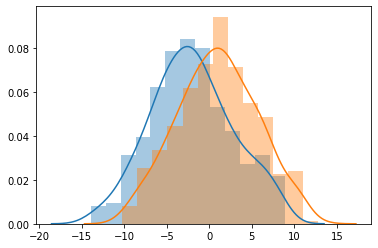

In [0]:
# in this stage, a central tendency measure will be selected
x = sns.distplot(tsne_embedded[:, 0], label="X-D")
y = sns.distplot(tsne_embedded[:, 1], label="Y-D")
# Both X and Y distributed normaly in Covet Text Embedding
# So which central tendency is suitable for this type of data (not skewed)

## **Mean(Arithmatic) Computation**

In [0]:
cover_text_embedding_mean_x = tsne_embedded[:, 0].mean()
# print('X:', cover_text_embedding_mean_x)
cover_text_embedding_mean_y = tsne_embedded[:, 1].mean()
# print('Y:', cover_text_embedding_mean_y)
print('Cover_text_embedding_mean[X Y]=[', cover_text_embedding_mean_x,'', cover_text_embedding_mean_y,']')

Cover_text_embedding_mean[X Y]=[ -2.0296316  0.9792457 ]
